In [6]:
import sys
import os

parent_dir = os.path.abspath("..")
sys.path.append(parent_dir)

import numpy as np
import random
import matplotlib.pyplot as plt

train_data = np.load('../data/train_data.npy', allow_pickle=True)
test_data = np.load('../data/test_data.npy', allow_pickle=True)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (100,)
Testing data shape: (1,)


### Sample Distribution - Global

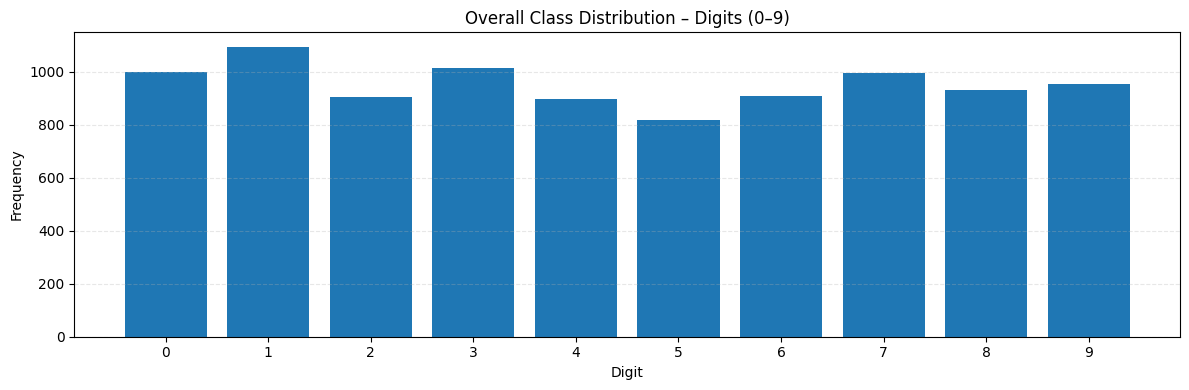

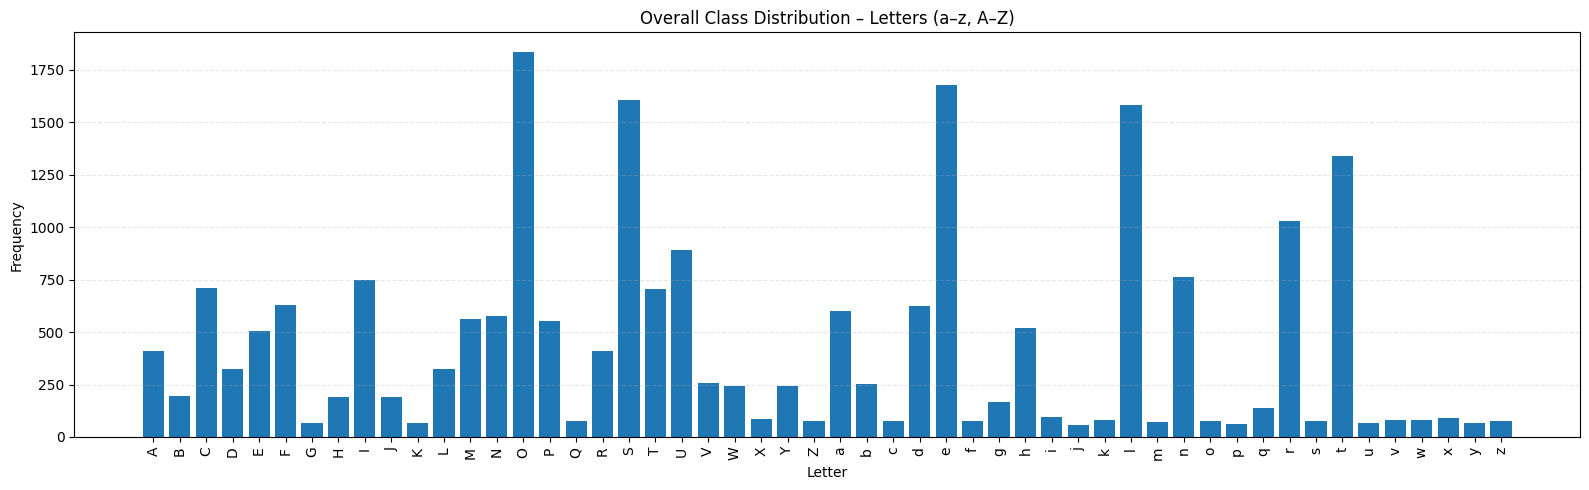

In [7]:
all_labels = []
for cid in range(100):
    all_labels.extend(train_data[cid]["labels"])

overall_hist = np.bincount(all_labels, minlength=62)

digit_labels = [str(i) for i in range(10)]
lowercase_labels = [chr(ord('a') + i) for i in range(26)]     # labels 10–35
uppercase_labels = [chr(ord('A') + i) for i in range(26)]     # labels 36–61
letter_labels = uppercase_labels + lowercase_labels   # length 52

# DIGITS PLOT (0–9)
plt.figure(figsize=(12, 4))
plt.bar(range(10), overall_hist[:10])
plt.title("Overall Class Distribution – Digits (0–9)")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(range(10), digit_labels)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# LETTERS PLOT (a–z, A–Z)
plt.figure(figsize=(16, 5))
plt.bar(range(52), overall_hist[10:62])
plt.title("Overall Class Distribution – Letters (a–z, A–Z)")
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.xticks(range(52), letter_labels, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



### Sample Distribution - Per Client

Selected clients: [37, 27, 47, 76, 30]


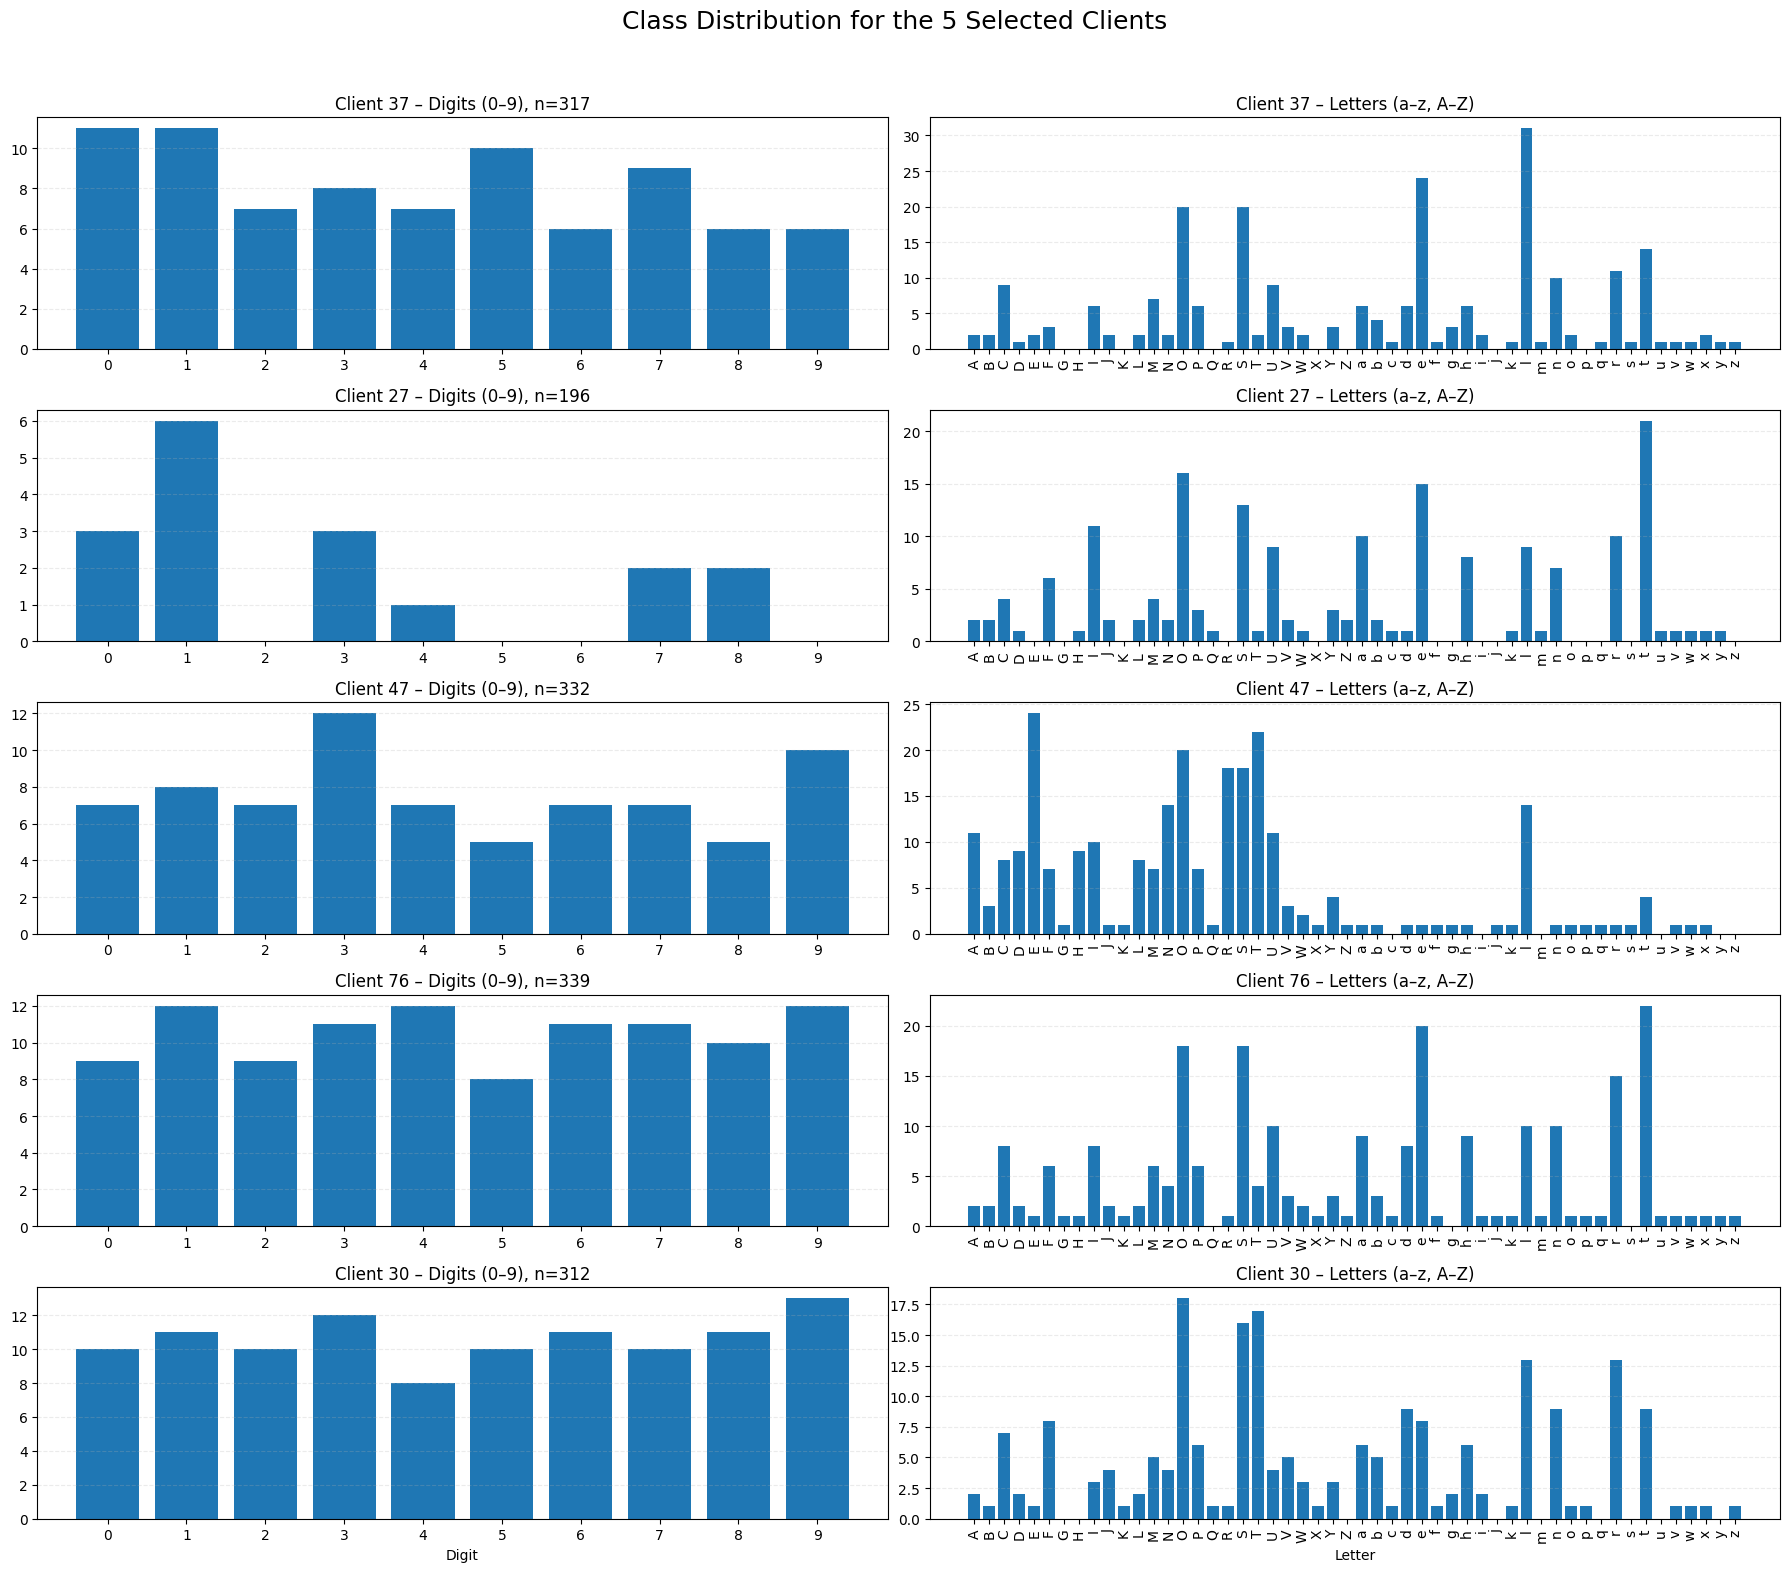

In [8]:
client_ids = [random.randint(0, 99) for _ in range(5)]
print("Selected clients:", client_ids)

fig, axes = plt.subplots(5, 2, figsize=(18, 16))
fig.suptitle("Class Distribution for the 5 Selected Clients", fontsize=18)

for row_idx, cid in enumerate(client_ids):
    labels = train_data[cid]["labels"]
    hist = np.bincount(labels, minlength=62)

    # Left column: digits 0–9
    ax_digits = axes[row_idx, 0]
    ax_digits.bar(range(10), hist[:10])
    ax_digits.set_title(f"Client {cid} – Digits (0–9), n={len(labels)}")
    ax_digits.set_xticks(range(10))
    ax_digits.set_xticklabels(digit_labels)
    ax_digits.grid(axis='y', linestyle='--', alpha=0.25)

    # Right column: letters a–z, A–Z
    ax_letters = axes[row_idx, 1]
    ax_letters.bar(range(52), hist[10:62])
    ax_letters.set_title(f"Client {cid} – Letters (a–z, A–Z)")
    ax_letters.set_xticks(range(52))
    ax_letters.set_xticklabels(letter_labels, rotation=90)
    ax_letters.grid(axis='y', linestyle='--', alpha=0.25)

# Label bottom axes
axes[-1, 0].set_xlabel("Digit")
axes[-1, 1].set_xlabel("Letter")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Randomly Selected Image & Label Pairs

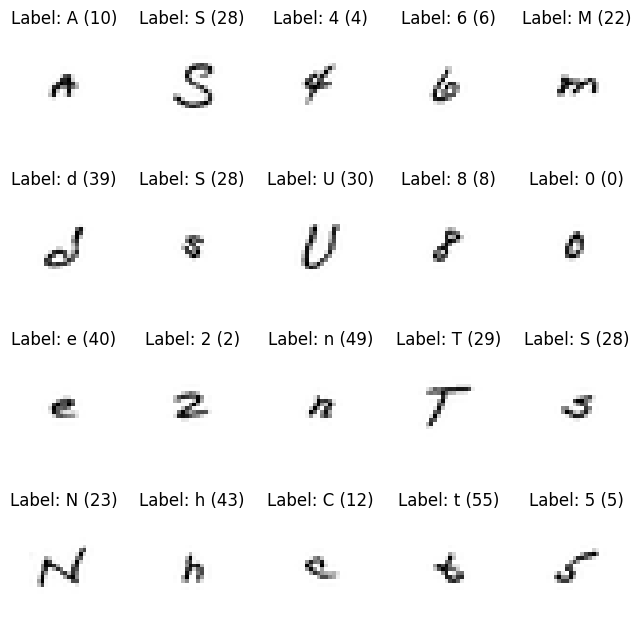

In [15]:
client_id = 0
num_images = 20

images = train_data[client_id]["images"]
labels = train_data[client_id]["labels"]

all_standard_labels = digit_labels + letter_labels
images_ids = random.sample(range(len(images)), num_images)

plt.figure(figsize=(8, 8))
bl = 0
for i in images_ids:
    plt.subplot(4, 5, bl+1)
    plt.imshow(images[i], cmap='gray')
    raw_label = labels[i]
    translated_label = all_standard_labels[raw_label]
    plt.title(f"Label: {translated_label} ({raw_label})")
    plt.axis('off')
    bl += 1
plt.show()

### Effect of added Laplace Noise 

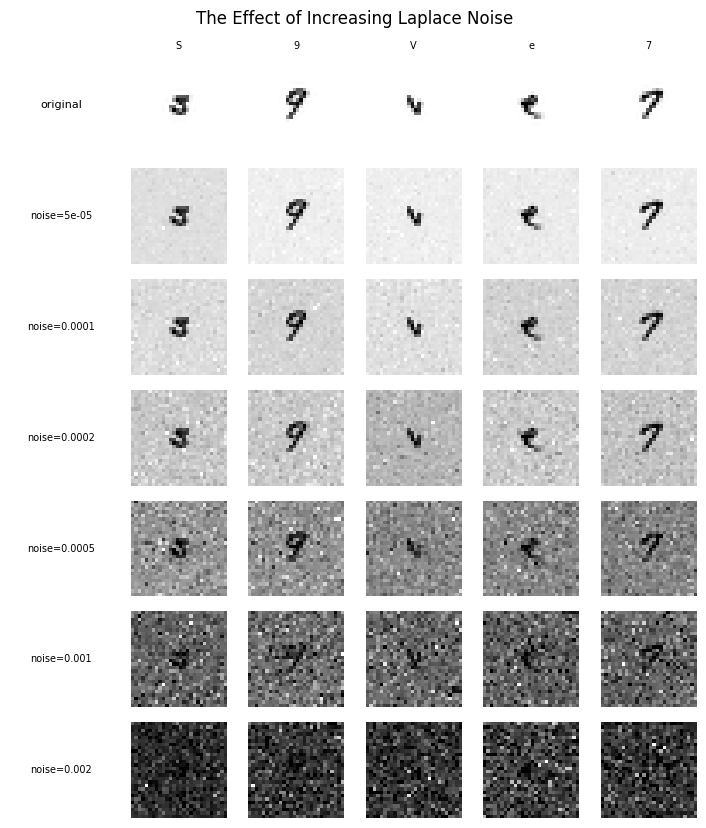

In [27]:
client_id = 0
num_images = 5

noise_levels = [5e-5, 1e-4, 2e-4, 5e-4, 1e-3, 2e-3]
image_ids = random.sample(range(len(images)), num_images)

rows = 1 + len(noise_levels)
cols = num_images + 1   # +1 column for labels

plt.figure(figsize=((cols) * 1.2, rows * 1.2))

# ---- First row: original images ----
ax = plt.subplot(rows, cols, 1)  # label column cell
ax.text(0.5, 0.5, "original",
        ha='center', va='center', fontsize=8)
ax.axis('off')

for col, idx in enumerate(image_ids):
    ax = plt.subplot(rows, cols, col + 2)
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(all_standard_labels[labels[idx]], fontsize=7)
    ax.axis('off')

# ---- Noisy rows ----
for row, noise_level in enumerate(noise_levels, start=1):

    # Left label column
    ax = plt.subplot(rows, cols, row * cols + 1)
    ax.text(0.5, 0.5, f"noise={noise_level}",
            ha='center', va='center', fontsize=7)
    ax.axis('off')

    # Images
    for col, idx in enumerate(image_ids):
        noisy = images[idx] / 255.0
        noise = np.random.laplace(0, noise_level, noisy.shape)
        noisy = np.clip(noisy + noise, 0.0, 1.0)

        ax = plt.subplot(rows, cols, row * cols + col + 2)
        ax.imshow(noisy, cmap='gray')
        ax.axis('off')

plt.suptitle("The Effect of Increasing Laplace Noise", fontsize=12)
plt.tight_layout()
plt.show()
